In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\ML Projects\\AV'

In [3]:
#Importing the data

path = 'C:/Users/hp/Desktop/ML Projects/AV'

img_dir = path + '/images'


    
    


In [4]:
labels = pd.read_csv('train.csv').iloc[:,:].values

In [5]:
train_len = len(labels)
test_len = len(os.listdir(img_dir))-train_len

print(train_len,test_len)

6252 2680


In [6]:
train_data = []
def creat_trainng_dataset(labels, desired_size = (160,210)):
    for label in labels:
        img_array = cv2.imread(os.path.join(img_dir,label[0]),cv2.IMREAD_GRAYSCALE)/255
        delta_w = desired_size[1] - img_array.shape[1]
        delta_h = desired_size[0] - img_array.shape[0]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        color = [0, 0, 0]
        img = cv2.copyMakeBorder(img_array, top, bottom, left, right, cv2.BORDER_CONSTANT,
            value=color)
        img_label = label[1]
        train_data.append([img, img_label])


In [7]:
creat_trainng_dataset(labels)

In [8]:
len(train_data)

6252

In [9]:
test_data = []
def creat_test_dataset(labels,desired_size = (160,210)):
    for i in os.listdir(img_dir):
        if i not in labels:
            img_array = cv2.imread(os.path.join(img_dir,i),cv2.IMREAD_GRAYSCALE)/255
            delta_w = desired_size[1] - img_array.shape[1]
            delta_h = desired_size[0] - img_array.shape[0]
            top, bottom = delta_h//2, delta_h-(delta_h//2)
            left, right = delta_w//2, delta_w-(delta_w//2)
            color = [0, 0, 0]
            img = cv2.copyMakeBorder(img_array, top, bottom, left, right, cv2.BORDER_CONSTANT,
                value=color)
            test_data.append(img)
        
creat_test_dataset(labels)

In [10]:
len(test_data)

2680

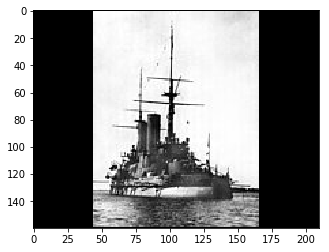

In [11]:
plt.imshow(test_data[3],cmap = 'gray')

In [12]:
print(np.shape(train_data),np.shape(test_data))

(6252, 2) (2680, 160, 210)


In [13]:
max_height = max([np.shape(train_data[i][0])[0] for i in range(len(train_data))])
min_height = min([np.shape(train_data[i][0])[0] for i in range(len(train_data))])
max_width = max([np.shape(train_data[i][0])[1] for i in range(len(train_data))])
min_width = min([np.shape(train_data[i][0])[1] for i in range(len(train_data))])

print(max_height,max_width,min_height,min_width)

160 210 160 210


In [14]:
X_train = []
y_train = []
for features,labels in train_data:
    X_train.append(features)
    y_train.append(labels)
    


In [20]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out = open("test_data.pickle","wb")
pickle.dump(test_data,pickle_out)
pickle_out.close()